# Flight Price Prediction
---

I choose flight prices dataset which is avaliable on www.kaggle.com.I choose this dataset because it is related to a real world
business problem
Dataset Link:https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

Dataset Description:


### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### importing dataset

In [2]:
train_data = pd.read_excel(r"E:\ML Projects\Flight-Price-Prediction-master\Flight-Price-Prediction-master\Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### checking missing values

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### drop missing values

In [8]:
train_data.dropna(inplace = True)
train_data.shape

(10682, 11)

---

##### making a new feature Journey_day by Date_of_Journey

In [9]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_day"]

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

##### making a new feature Journey_month by Date_of_Journey

In [10]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train_data["Journey_month"]

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_month, Length: 10682, dtype: int64

##### making a new feature Journey_year by Date_of_Journey

In [11]:
train_data["Journey_year"]=pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year
train_data["Journey_year"]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Journey_year, Length: 10682, dtype: int64

In [12]:
train_data["Journey_year"].unique()

array([2019], dtype=int64)

##### removing Date_of_Journey and Journey_year feature

In [13]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey","Journey_year"], axis = 1, inplace = True)

##### exploring Departure Time feature

In [14]:
train_data["Dep_Time"]
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

##### making a new feature 'Dep_hour' by Extracting Hours from feature 'Dep_Time'

In [15]:
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_hour"]

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hour, Length: 10682, dtype: int64

##### making a new feature 'Dep_min' by Extracting Minutes from feature 'Dep_Time'

In [16]:
# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data["Dep_min"]

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10682, dtype: int64

##### removing Departure Time  feature

In [17]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

##### exploring Arrival Time feature

In [18]:
train_data['Arrival_Time']
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

##### making a new feature Arrival hour by Extracting Hours from feature Arrival_Time

In [19]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_hour"]

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hour, Length: 10682, dtype: int64

##### making a new feature Arrival Minutes by Extracting Minutes from feature Arrival_Time

In [20]:
# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data["Arrival_min"]

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_min, Length: 10682, dtype: int64

##### removing Arrival_Time feature

In [21]:
# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
train_data["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

##### making two lists duration_hours and duration_mins lists

In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

##### making a new feature Duration_minss by multipling hours with 60 and then adding miniuts to result

In [24]:
train_data["Duration_mins"] = np.array(duration_hours)*60+np.array(duration_mins)
train_data["Duration_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_mins, Length: 10682, dtype: int32

##### removing Duration feature

In [25]:
train_data.drop(["Duration"], axis = 1, inplace = True)

---

### EDA

##### qualitative features

In [26]:
qual_features=[feature for feature in train_data.columns if len(train_data[feature].unique())<10]
qual_features

['Source', 'Destination', 'Total_Stops', 'Journey_month']

In [27]:
for feature in qual_features:
    print(feature)
    print(train_data[feature].unique())

Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
Journey_month
[3 5 6 4]


##### showing relationships between qualitative features and flight prices using bar charts

Source


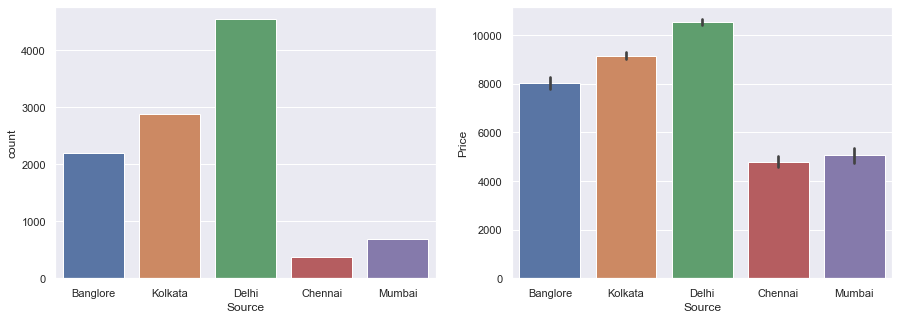

Destination


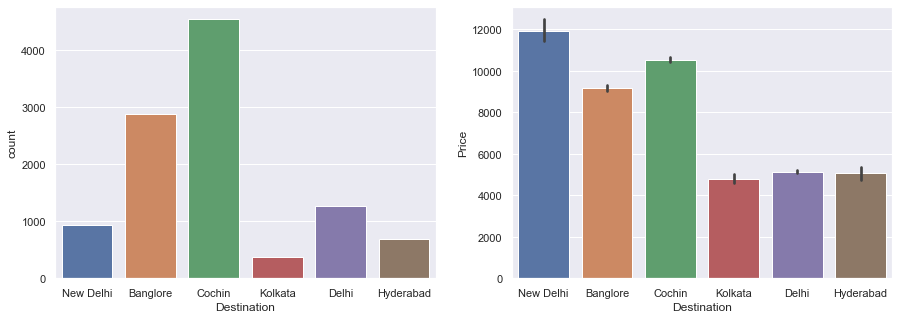

Total_Stops


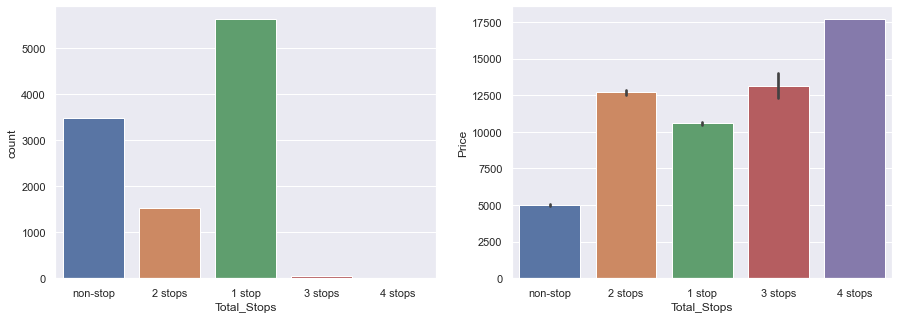

Journey_month


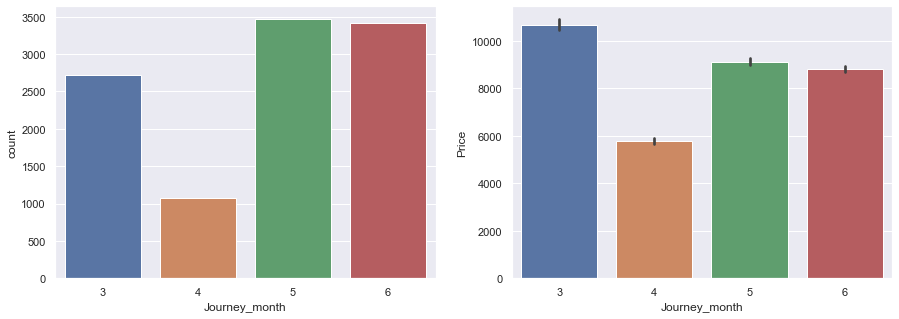

In [28]:
for feature in qual_features:
    print(feature)
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature,data=train_data)
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature,y='Price',data=train_data)
    plt.show()

##### quantitative features

In [29]:
quant_features=[feature for feature in train_data.columns if train_data[feature].dtype!='O' and 
                len(train_data[feature].unique())>10 ]
quant_features

['Price',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_mins']

##### showing distributions of quantitave features histograms

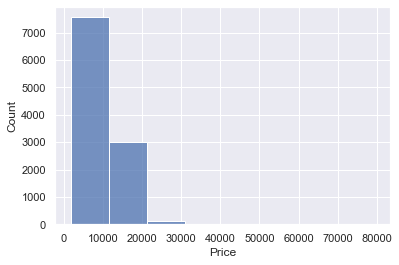

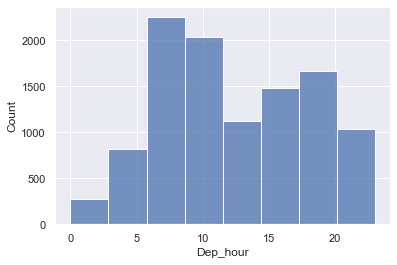

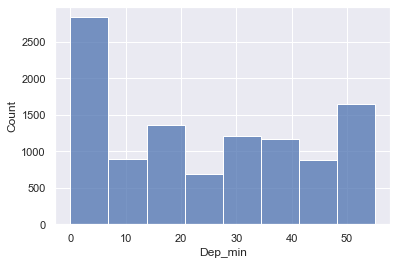

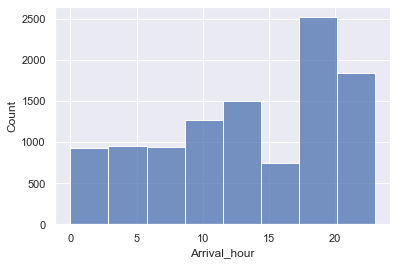

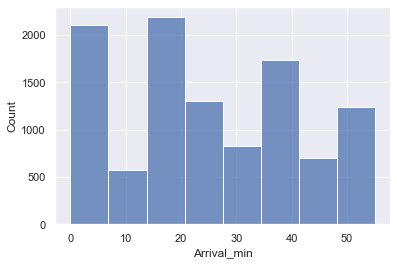

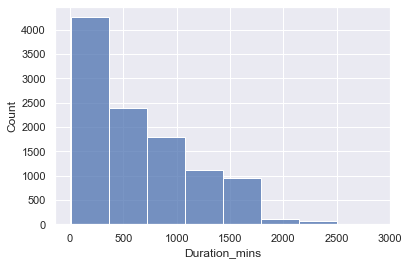

In [30]:
for feature in quant_features:
    sns.histplot(train_data[feature],bins=8)
    plt.show()

#### exploring Airline feature

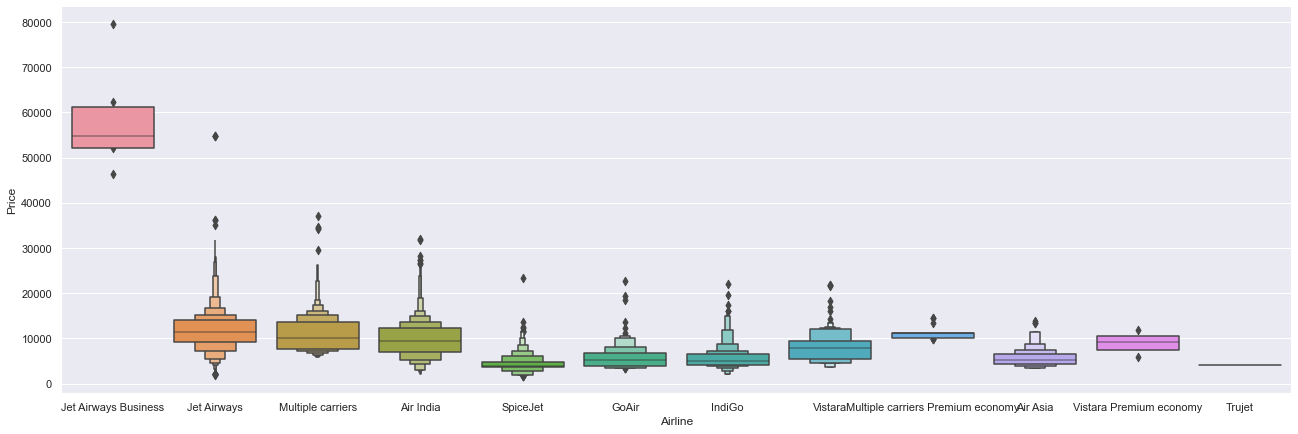

In [31]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
Airline.shape

(10682, 11)

In [35]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### exploring source feature

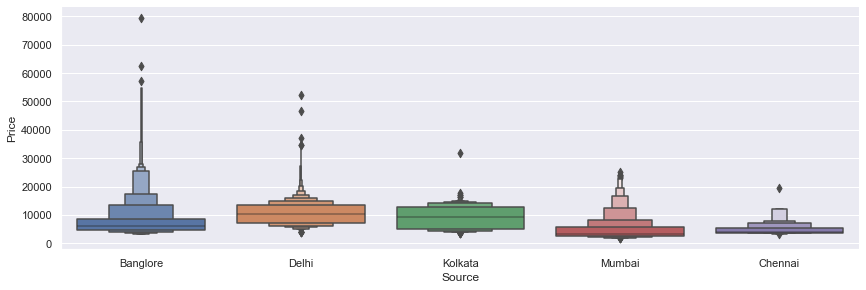

In [36]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), 
            kind="boxen", height = 4, aspect = 3)
plt.show()

In [37]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#### exploring destination feature

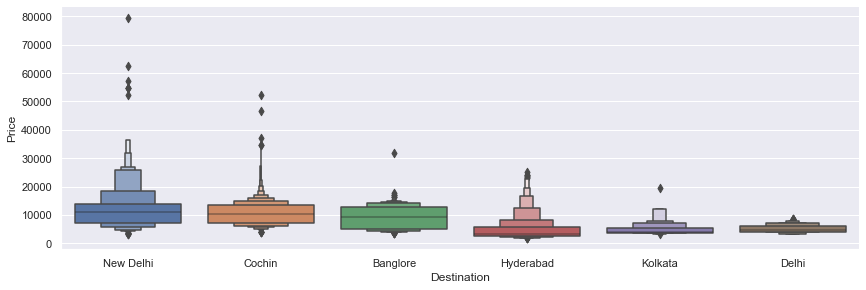

In [39]:
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), 
            kind="boxen", height = 4, aspect = 3)
plt.show()

In [40]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [41]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [42]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [43]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [45]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


In [46]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [47]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## preparing dataset for regression

#### sipiliting dataset into dependant and independant

In [48]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [49]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
data_train.shape

(10682, 29)

---

## Feature Selection


In [51]:
data_train.shape

(10682, 29)

In [52]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
len(data_train.columns)

29

In [54]:
X = data_train.drop(['Price'],axis=1)

In [55]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#### heatmap of correlations

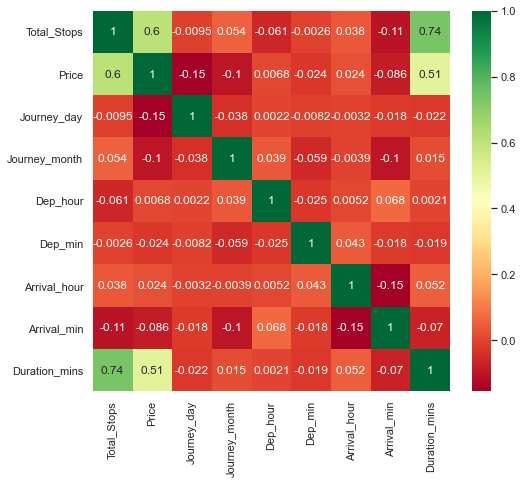

In [57]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (8,7))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [58]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)

[2.07956121e-01 1.44219007e-01 5.25791543e-02 2.72855370e-02
 2.56360801e-02 3.06462231e-02 2.19262367e-02 1.33707581e-01
 1.08446644e-02 1.80334744e-03 1.69144301e-02 1.42207494e-01
 6.78423016e-02 1.82230093e-02 9.00605144e-04 2.59049362e-03
 7.99094363e-05 5.12872892e-03 7.22814149e-05 3.43925117e-04
 1.37597883e-02 3.14906325e-03 7.36918702e-03 1.33579882e-02
 1.90799067e-02 6.76650913e-03 5.32646319e-04 2.50777806e-02]


#### graph of feature importances for better visualization

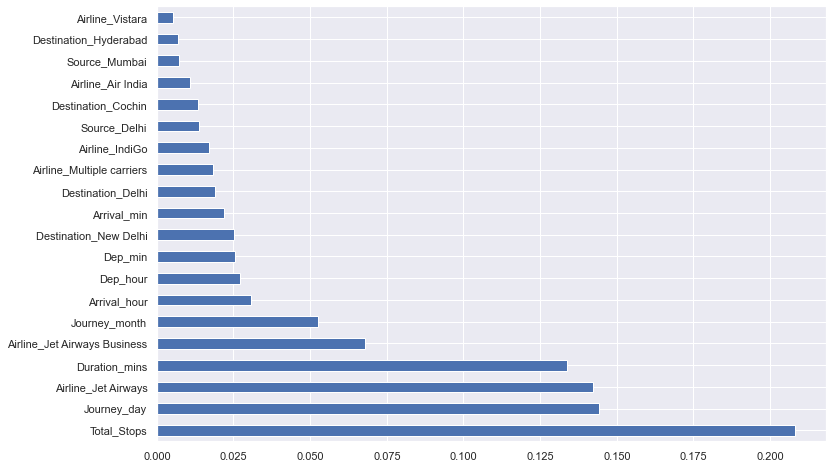

In [60]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

#### train test splitting

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8545, 28), (2137, 28), (8545,), (2137,))

#### Model building

In [63]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [64]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

### predictions


In [66]:
X_test.iloc[5]

Total_Stops                                    1
Journey_day                                    6
Journey_month                                  5
Dep_hour                                       7
Dep_min                                       30
Arrival_hour                                  19
Arrival_min                                    0
Duration_mins                                690
Airline_Air India                              0
Airline_GoAir                                  0
Airline_IndiGo                                 0
Airline_Jet Airways                            0
Airline_Jet Airways Business                   0
Airline_Multiple carriers                      1
Airline_Multiple carriers Premium economy      0
Airline_SpiceJet                               0
Airline_Trujet                                 0
Airline_Vistara                                0
Airline_Vistara Premium economy                0
Source_Chennai                                 0
Source_Delhi        

In [67]:
arr=np.array(X_test.iloc[5],ndmin=2)

In [68]:
LR.predict(arr)

array([11188.30128002])

In [69]:
DTR.predict(arr)

array([9554.5])

In [70]:
RFR.predict(arr)

array([9583.40166667])

In [71]:
y_test.iloc[5]

10529

### Evaluation of Linear Regression Model

#### acuracy score

In [72]:
LR.score(X_test, y_test)

0.6196858941274607

In [73]:
DTR.score(X_test, y_test)

0.7795549788144327

In [74]:
RFR.score(X_test, y_test)

0.8227340382215294

#### Visualizing difference between actual and predictions using histogram 

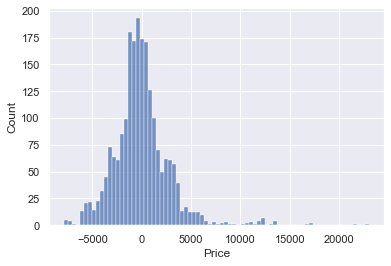

In [75]:
LR_pred=LR.predict(X_test)
sns.histplot(y_test-LR_pred)
plt.show()

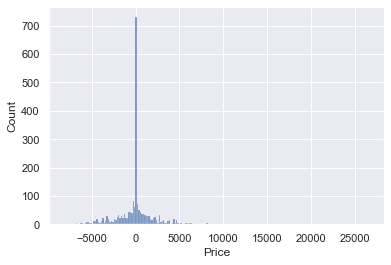

In [76]:
DTR_pred=DTR.predict(X_test)
sns.histplot(y_test-DTR_pred)
plt.show()

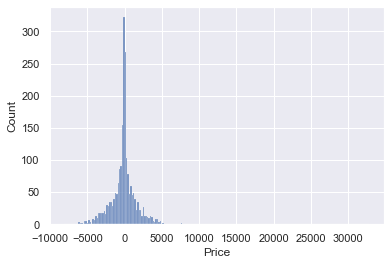

In [77]:
RFR_pred=RFR.predict(X_test)
sns.histplot(y_test-RFR_pred)
plt.show()

#### Visualizing by scatter plots

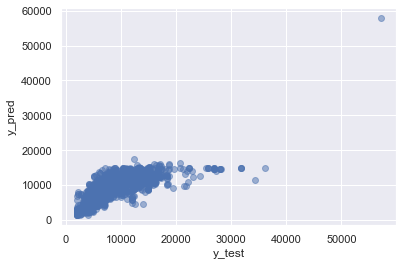

In [78]:
plt.scatter(y_test,LR_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

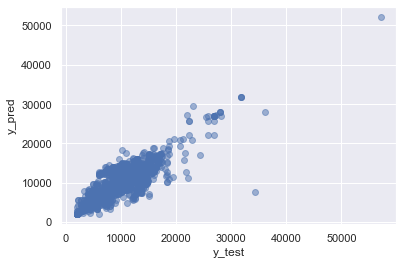

In [79]:
plt.scatter(y_test,DTR_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

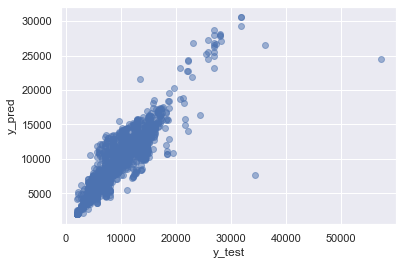

In [80]:
plt.scatter(y_test,RFR_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### Mean Absolute Error

In [81]:
from sklearn.metrics import mean_absolute_error
print('MAE:',mean_absolute_error(y_test, LR_pred))

MAE: 1972.9471133405893


In [82]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, DTR_pred))

MAE: 1296.6401107471536


In [83]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, RFR_pred))

MAE: 1158.1830102336571


#### mean_squared_error

In [84]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, LR_pred))

MSE: 8200354.171696921


In [85]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, DTR_pred))

MSE: 4753247.96318424


In [86]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, RFR_pred))

MSE: 3822218.652224093


#### root mean_squared_error

In [87]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,LR_pred)))

RMSE: 2863.6260530482887


In [88]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,DTR_pred)))

RMSE: 2180.194478294136


In [89]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,RFR_pred)))

RMSE: 1955.0495267957008


## preparing dataset for classification 

#### sipiliting dataset into dependant and independant

In [91]:
data_train['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [92]:
data_train['Price_condition']=(train_data['Price']>=train_data['Price'].median()).astype(int)
data_train['Price_condition']

0        0
1        0
2        1
3        0
4        1
        ..
10678    0
10679    0
10680    0
10681    1
10682    1
Name: Price_condition, Length: 10682, dtype: int32

In [93]:
X=data_train.drop(['Price_condition','Price'],axis=1)

In [94]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,150,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,155,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,180,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,160,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [95]:
y=data_train['Price_condition']
y

0        0
1        0
2        1
3        0
4        1
        ..
10678    0
10679    0
10680    0
10681    1
10682    1
Name: Price_condition, Length: 10682, dtype: int32

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Model building for classification


In [97]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

### predictions

In [99]:
X_test.iloc[10]

Total_Stops                                    0
Journey_day                                   15
Journey_month                                  5
Dep_hour                                       4
Dep_min                                        0
Arrival_hour                                   6
Arrival_min                                   50
Duration_mins                                170
Airline_Air India                              0
Airline_GoAir                                  0
Airline_IndiGo                                 1
Airline_Jet Airways                            0
Airline_Jet Airways Business                   0
Airline_Multiple carriers                      0
Airline_Multiple carriers Premium economy      0
Airline_SpiceJet                               0
Airline_Trujet                                 0
Airline_Vistara                                0
Airline_Vistara Premium economy                0
Source_Chennai                                 0
Source_Delhi        

In [100]:
arr=np.array(X_test.iloc[10],ndmin=2)

In [112]:
DTC.predict(arr)

array([0])

In [113]:
RFC.predict(arr)

array([0])

## Evaluating classification model

### accuracy score

In [105]:
DTC.score(X_test,y_test)

0.9218530650444549

In [106]:
RFC.score(X_test,y_test)

0.9284043051006083

### precision,recall and f1_score

In [107]:
from sklearn import metrics
y_pred=DTC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)
pre=metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.9218530650444549
Precision: 0.9242009132420091
Recall: 0.9233576642335767
F1_score: 0.923779096303058


In [108]:
from sklearn import metrics
y_pred=RFC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)
pre=metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.9284043051006083
Precision: 0.9206066012488849
Recall: 0.9416058394160584
F1_score: 0.9309878213802436


### classification report

In [110]:
from sklearn.metrics import classification_report
y_pred=DTC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1041
           1       0.92      0.92      0.92      1096

    accuracy                           0.92      2137
   macro avg       0.92      0.92      0.92      2137
weighted avg       0.92      0.92      0.92      2137



In [111]:
from sklearn.metrics import classification_report
y_pred=RFC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1041
           1       0.92      0.94      0.93      1096

    accuracy                           0.93      2137
   macro avg       0.93      0.93      0.93      2137
weighted avg       0.93      0.93      0.93      2137

